In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
train_data = pd.read_csv("train_data.csv") 
train_data.head() 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
# test_data = pd.read_csv("test_data.csv")
# test_data.head() 

In [ ]:
train_data.shape

(20000, 12)

In [ ]:
train_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


<Axes: >

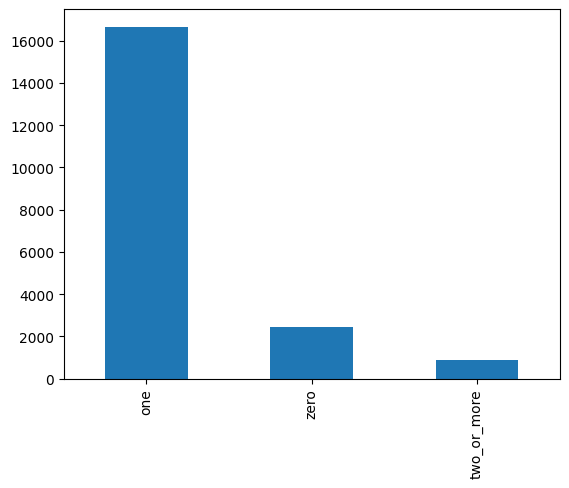

In [ ]:
train_data["stops"].value_counts().plot(kind="bar")

In [ ]:
# train_data["stops"] = train_data["stops"].map({"one":1, "zero":0 ,"two_or_more": 2})
# train_data.head()

Distribution of duration and hue is source_city


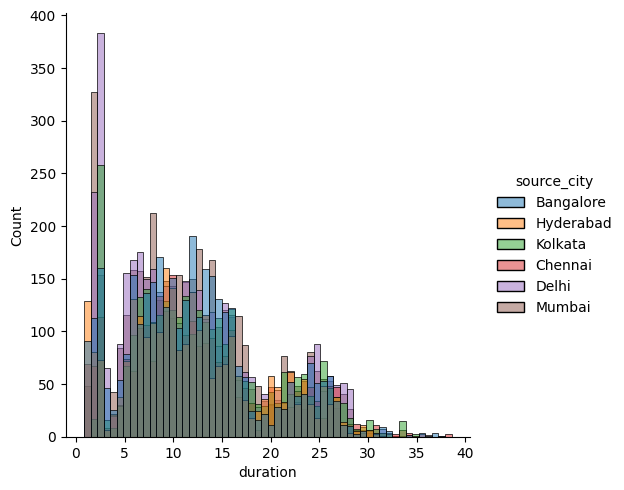

Distribution of duration and hue is departure_time


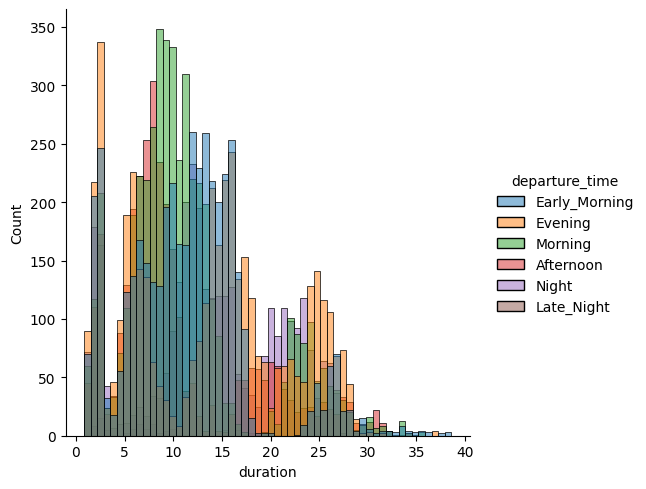

Distribution of duration and hue is arrival_time


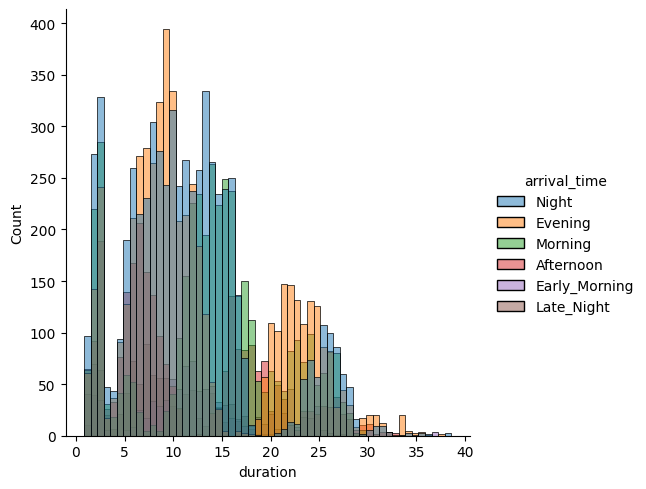

Distribution of duration and hue is destination_city


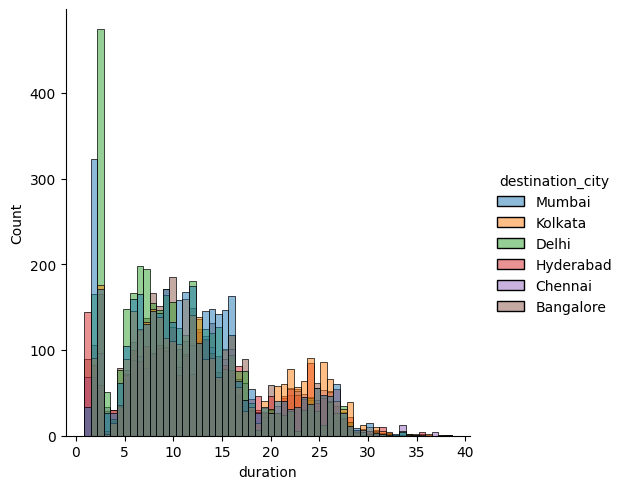

Distribution of duration and hue is class


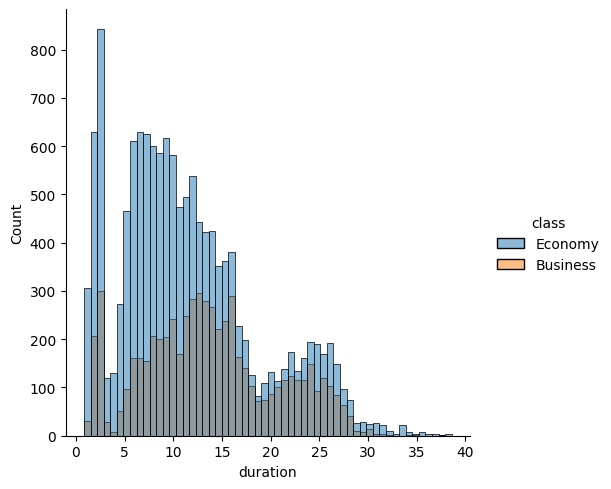

In [ ]:
for col in ["source_city","departure_time","arrival_time","destination_city","class"]:
  sns.displot(data=train_data, x="duration", hue=col)
  print("Distribution of duration and hue is", col)
  plt.show() 

	 Distribution of price and hue is  source_city


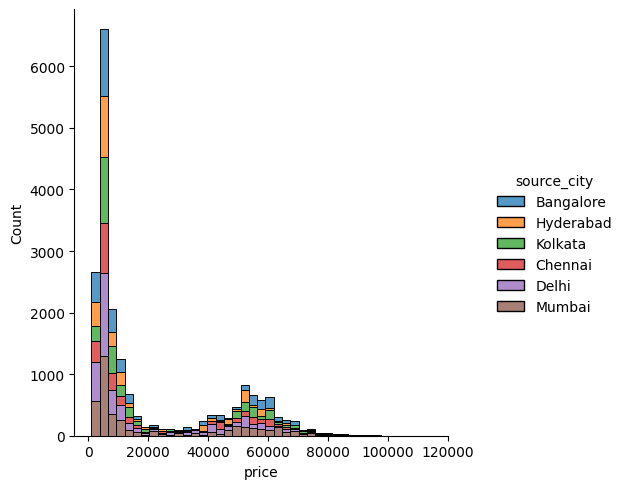

	 Distribution of price and hue is  departure_time


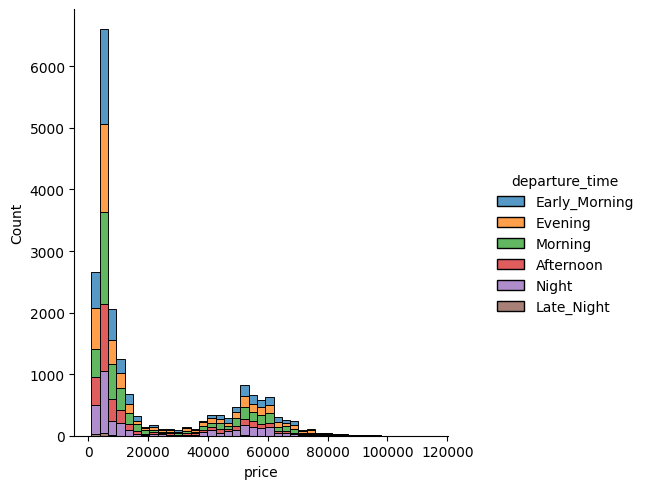

	 Distribution of price and hue is  arrival_time


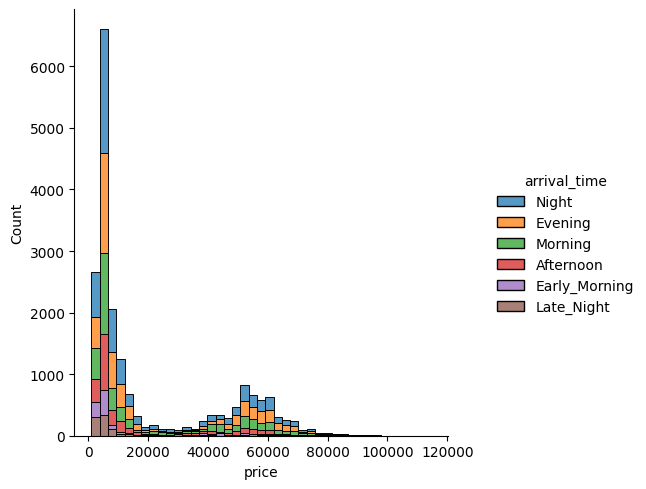

	 Distribution of price and hue is  destination_city


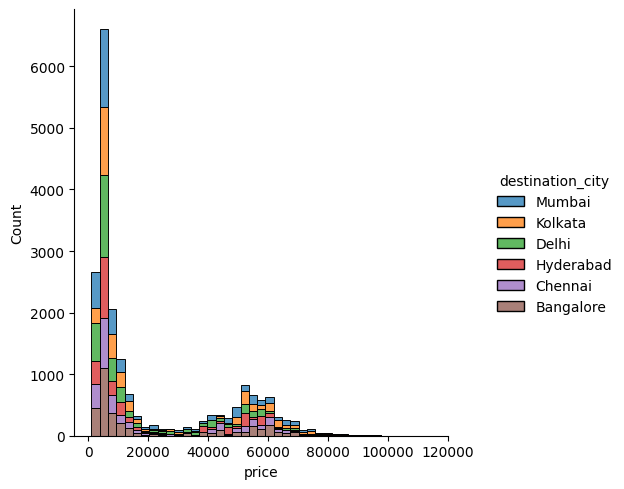

	 Distribution of price and hue is  class


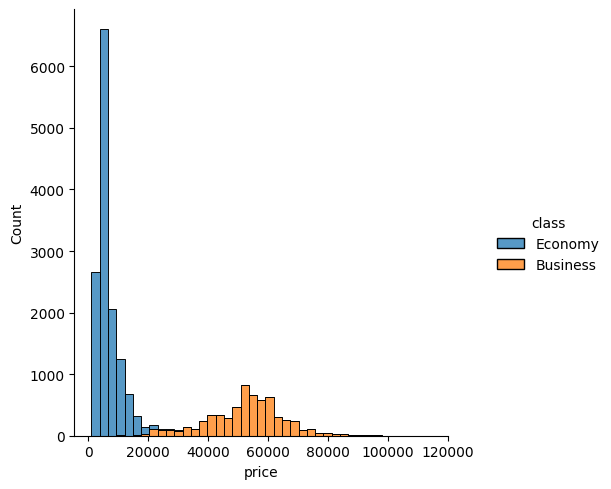

In [ ]:
for col in ["source_city","departure_time","arrival_time","destination_city","class"]:
  sns.displot(data=train_data, x="price", hue=col, multiple="stack")
  print("\t Distribution of price and hue is ", col) 
  plt.show()

In [ ]:
train_data.head() 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


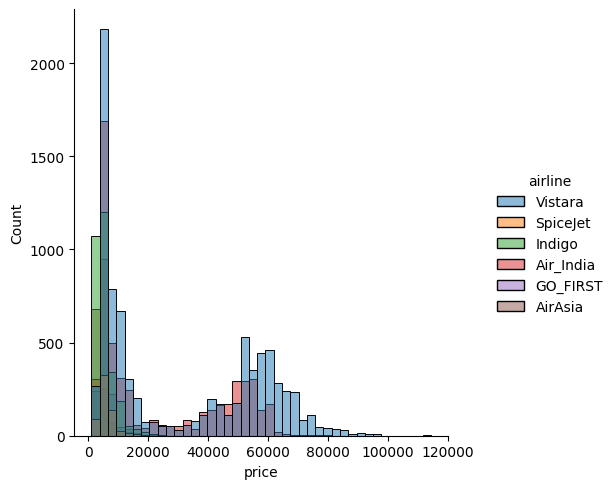

In [ ]:
sns.displot(data=train_data, x="price", hue="airline") 
plt.show() 

In [ ]:
train_data.flight.value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [ ]:
df = train_data.drop(["flight", "id"], axis=1)
df.head() 

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
train_data["class"].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

In [ ]:
df["class"] = df['class'].map({"Business": 1, "Economy": 0})
df.head()    

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,0,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,0,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,1,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,0,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,0,2.00,4,10712


In [ ]:
train_data.destination_city.value_counts() 

Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

In [ ]:
train_data[["airline"]].head()

,airline
0,Vistara
1,SpiceJet
2,Vistara
3,Vistara
4,Indigo


In [ ]:
airline_data = pd.get_dummies(df.airline)
source_city_data = pd.get_dummies(df.source_city) 
departure_time_data = pd.get_dummies(df.departure_time) 
arival_time_data = pd.get_dummies(df.arrival_time)
destination_city_data = pd.get_dummies(df.destination_city)


In [ ]:
df2 = df.drop(["airline","source_city","departure_time","arrival_time","destination_city"], axis=1)
df2.head()

,stops,class,duration,days_left,price
0,one,0,14.25,21,7212
1,zero,0,1.75,7,5292
2,one,1,9.58,5,60553
3,one,0,6.75,28,5760
4,zero,0,2.00,4,10712


In [ ]:
df3 = pd.concat([airline_data,source_city_data,departure_time_data,arival_time_data,destination_city_data,df2], axis=1)
df3.head()
# df3.columns = ["stops","class","duration","days_left","price","Airline","Source_city","Departure_time","Arrival_time","Destination_city"]

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,Chennai,Delhi,Hyderabad,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,stops,class,duration,days_left,price
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,one,0,14.25,21,7212
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,zero,0,1.75,7,5292
2,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,one,1,9.58,5,60553
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,one,0,6.75,28,5760
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,zero,0,2.00,4,10712


In [ ]:
df3.corrwith(df3["price"])

AirAsia         -0.174272
Air_India        0.070827
GO_FIRST        -0.191557
Indigo          -0.283825
SpiceJet        -0.115649
Vistara          0.360410
Bangalore        0.016966
Chennai          0.008925
Delhi           -0.041629
Hyderabad       -0.030848
Kolkata          0.009223
Mumbai           0.036125
Afternoon       -0.045462
Early_Morning   -0.020004
Evening          0.009324
Late_Night      -0.037237
Morning          0.016467
Night            0.045041
Afternoon       -0.048976
Early_Morning   -0.070650
Evening          0.063804
Late_Night      -0.097337
Morning          0.044133
Night            0.013207
Bangalore        0.015385
Chennai          0.020512
Delhi           -0.064619
Hyderabad       -0.016315
Kolkata          0.041162
Mumbai           0.007472
class            0.937868
duration         0.213158
days_left       -0.102545
price            1.000000
dtype: float64

<Axes: xlabel='price', ylabel='class'>

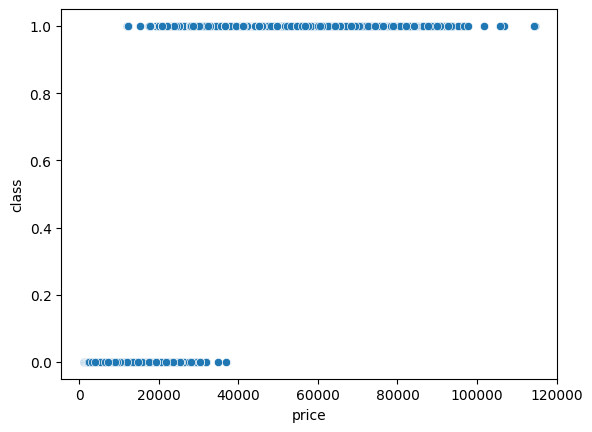

In [ ]:
sns.scatterplot(data=df3, x="price", y="class")

In [ ]:
# train_data.head() 

In [ ]:
# X, y = df3.drop("price", axis=1), df3["price"]
# X.head()

In [ ]:
train_data.head() 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:

cat_list = ["airline","source_city","departure_time","destination_city","class"]
num_list = ["duration","days_left"]

column_transformer = ColumnTransformer([
    ("std_scaler", StandardScaler(), num_list),
    ("cat_encode", OneHotEncoder(sparse=False), cat_list),
  ]
) 

df2 = train_data.drop(["flight","id"], axis=1)

X, y = df2.drop("price", axis=1), df2["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

X_train_prepared = column_transformer.fit_transform(X_train)
X_test_prepared = column_transformer.transform(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
# X_train

In [ ]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [ ]:
DT_predict = DT_model.predict(X_test_prepared)
DT_predict

array([ 6389.,  7959.,  5939., ...,  2074., 68317.,  1543.])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(DT_predict, y_test))

5201.09213170657

In [ ]:
DT_model.score(X_test_prepared, y_test)

0.9476733881402748

In [ ]:
train_data.groupby(["source_city","destination_city"])["duration"].mean().loc[("Bangalore", "Delhi")]

9.635237556561085

In [ ]:
RF_model = RandomForestRegressor(random_state=0)
RF_model.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rf_predict = RF_model.predict(X_test_prepared)
rf_predict

array([ 5435.64,  7262.46,  3637.3 , ...,  2994.79, 64599.91,  1683.98])

In [ ]:
np.sqrt(mean_squared_error(y_test, rf_predict))

4014.3477523792108

In [ ]:
RF_model.score(X_test_prepared, y_test)

0.9688280834812841

In [ ]:
RF_model.score(X_train_prepared, y_train)


0.9954792982971412

In [ ]:
cvs = -cross_val_score(RF_model, column_transformer.transform(df2.drop("price", axis=1)), df2["price"], scoring="neg_mean_squared_error", cv=10)
np.sqrt(cvs)

array([3795.66925436, 3943.90446301, 4227.80231739, 3577.43843241,
       3775.32635501, 3923.78498268, 4216.15762236, 3823.66825096,
       3797.59511281, 3891.81347023])

In [ ]:
np.mean(np.sqrt(cvs))

3897.3160261230014

In [ ]:
pd.DataFrame({"RF predict":rf_predict[:20], "data": y_test[:20]})

,RF predict,data
16970,5435.64,6389
13954,7262.46,7877
10003,3637.30,4855
4190,7320.94,8134
5399,2531.27,2409
2058,46696.88,44144
17030,5088.26,4593
10253,14619.82,15624
14398,15400.80,16212
16213,13444.08,13054


In [ ]:
pipeline = make_pipeline(column_transformer, RandomForestRegressor(random_state=0))

X, y = df2.drop("price", axis=1), df2["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

print(X_train["class"].value_counts(), X_test["class"].value_counts())


Economy     9630
Business    4370
Name: class, dtype: int64 Economy     4123
Business    1877
Name: class, dtype: int64


In [ ]:

df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat_encode',
                                                  OneHotEncoder(sparse=False),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'destination_city',
                                                   'class'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [ ]:
y_pred = pipeline.predict(X_test)
pd.DataFrame({"Actual price": y_test[:20], "Predicted price": y_pred[:20]})

,Actual price,Predicted price
16970,6389,5435.64
13954,7877,7262.46
10003,4855,3637.30
4190,8134,7320.94
5399,2409,2531.27
2058,44144,46696.88
17030,4593,5088.26
10253,15624,14619.82
14398,16212,15400.80
16213,13054,13444.08


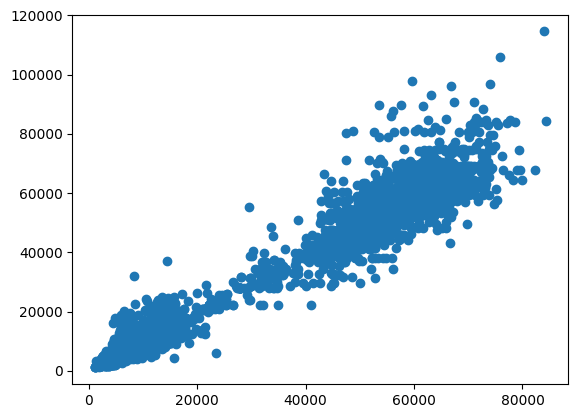

In [ ]:
plt.scatter(x=y_pred, y=y_test)
plt.show()

In [ ]:
pipeline.score(X_test, y_test)

0.9688280834812841

In [ ]:
import joblib

filename = "pipe_flight_price_predictor.jbl"
joblib.dump(pipeline, filename)


['pipe_flight_price_predictor.jbl']

In [ ]:
df2.groupby(["source_city","destination_city"])["duration"].mean().loc[("Bangalore", "Delhi")]

9.635237556561085

In [ ]:
df2.groupby(["source_city","destination_city","airline"]).mean()

duration  days_left         price
source_city destination_city airline                                      
Bangalore   Chennai          AirAsia     1.033846  30.923077   1728.846154
                             Air_India  16.431496  26.307087  26972.732283
                             GO_FIRST   10.674444  28.777778   4898.444444
                             Indigo      1.023846  24.846154   2477.538462
                             SpiceJet    1.080000  17.333333   3374.333333
...                                           ...        ...           ...
Mumbai      Kolkata          Air_India  16.079907  24.102326  24442.325581
                             GO_FIRST   10.099577  26.042254   6451.140845
                             Indigo      5.954021  25.422680   7133.103093
                             SpiceJet   15.370137  21.342466   7168.493151
                             Vistara    14.056136  24.312684  37441.702065

[175 rows x 3 columns]

In [ ]:
X_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
16970,GO_FIRST,Bangalore,Night,one,Morning,Mumbai,Economy,11.00,44
13954,Indigo,Chennai,Evening,one,Night,Delhi,Economy,5.67,14
10003,AirAsia,Mumbai,Early_Morning,one,Evening,Delhi,Economy,14.58,35
4190,Vistara,Delhi,Evening,one,Evening,Kolkata,Economy,21.00,16
5399,AirAsia,Delhi,Morning,one,Late_Night,Mumbai,Economy,15.00,37


In [ ]:
y_test.head()

16970    6389
13954    7877
10003    4855
4190     8134
5399     2409
Name: price, dtype: int64

In [ ]:
df2[(df2["source_city"] == "Bangalore") & (df2["destination_city"] == "Delhi")]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
7,Air_India,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
21,Air_India,Bangalore,Evening,one,Morning,Delhi,Business,15.08,17,42521
41,SpiceJet,Bangalore,Early_Morning,zero,Morning,Delhi,Economy,2.75,11,7488
83,Vistara,Bangalore,Evening,one,Morning,Delhi,Business,15.25,47,57081
...,...,...,...,...,...,...,...,...,...,...
19901,Vistara,Bangalore,Early_Morning,one,Evening,Delhi,Business,11.42,48,54841
19929,Indigo,Bangalore,Morning,one,Evening,Delhi,Economy,8.83,12,10061
19971,Vistara,Bangalore,Morning,one,Evening,Delhi,Economy,5.00,37,5407
19973,Vistara,Bangalore,Early_Morning,one,Afternoon,Delhi,Economy,7.83,45,4111


In [ ]:
df2.corrwith(df2["price"])

duration     0.213158
days_left   -0.102545
price        1.000000
dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Bangalore')])

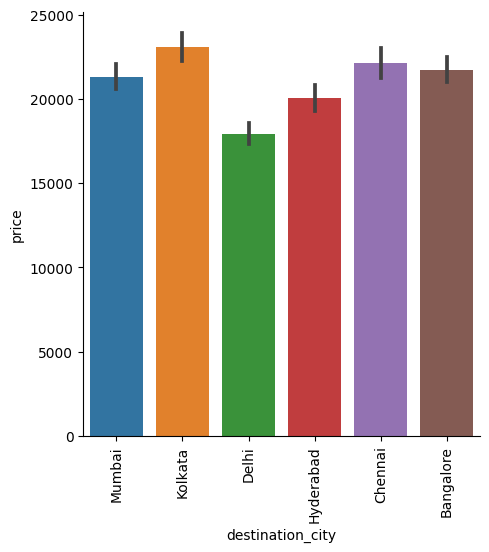

In [ ]:
# plt.bar(x=train_data.groupby("departure_time").price.mean())
sns.catplot(
    data=train_data, x="destination_city", y="price",
    kind="bar"
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Early_Morning'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Morning'),
  Text(3, 0, 'Afternoon'),
  Text(4, 0, 'Night'),
  Text(5, 0, 'Late_Night')])

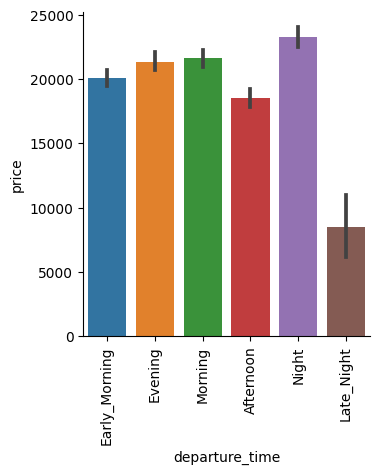

In [ ]:
sns.catplot(
    data=train_data, x="departure_time", y="price",
    kind="bar", height=4, aspect=1, 
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Bangalore')])

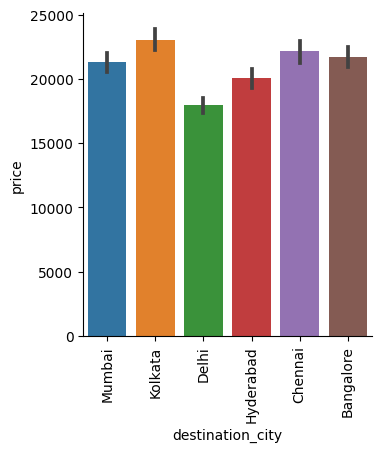

In [ ]:
sns.catplot(
    data=train_data, x="destination_city", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Morning'),
  Text(3, 0, 'Afternoon'),
  Text(4, 0, 'Early_Morning'),
  Text(5, 0, 'Late_Night')])

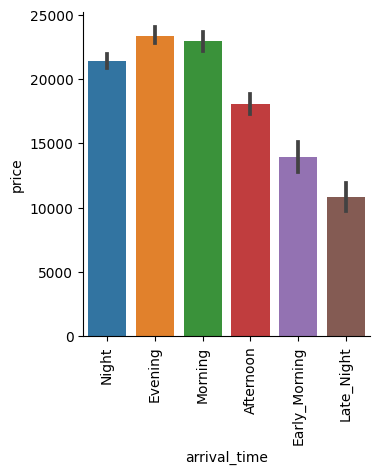

In [ ]:
sns.catplot(
    data=train_data, x="arrival_time", y="price",
    kind="bar", height=4, aspect=1,
)
plt.xticks(rotation=90)

In [ ]:
# as a conclusion i can say that random forest and decision tree have showed high accuracy so i chose random forest  
# as my main model. I was planning to drop some unnecessory columns too. It seemed like departure_time and arrival_time
# are not that necessoty. However after encoding these two columns i got normal accuracy. Here flight price depends on class 
# with high correlation


In [ ]:
X_test.sample(20).index

Int64Index([14145,   444, 15816,  7941, 16491, 15330,  5608, 10494, 17596,
            17406, 11247, 15664,  6933,  7579, 14684,  9273, 10419,  1445,
            16053, 11370],
           dtype='int64')